In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

<IPython.core.display.Javascript object>


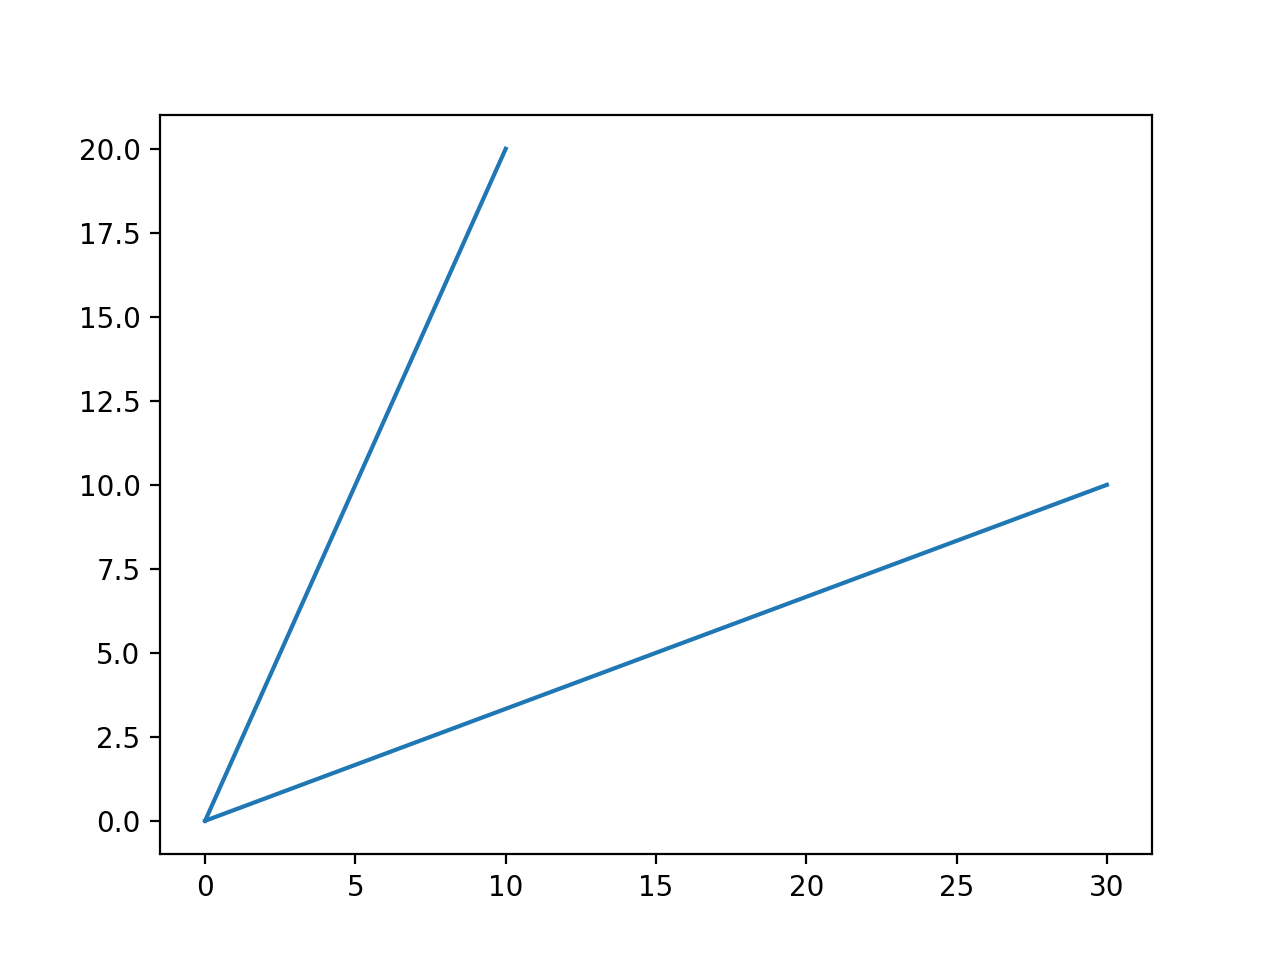

In [18]:
x1, x2 = np.array([1, 2]), np.array([3, 1])
theta1, theta2 = np.linspace(0, 10, 100), np.linspace(0, 10, 100)

plt.plot(*np.array([x1 * t for t in theta1]).T, color="tab:blue")
plt.plot(*np.array([x2 * t for t in theta2]).T, color="tab:blue")

Consider the cone
$$
    K = \{ (x_1,x_2) \mid 0 \leq x_1 \leq x_2 \} \subseteq \mathbf{R}^2
$$

<IPython.core.display.Javascript object>


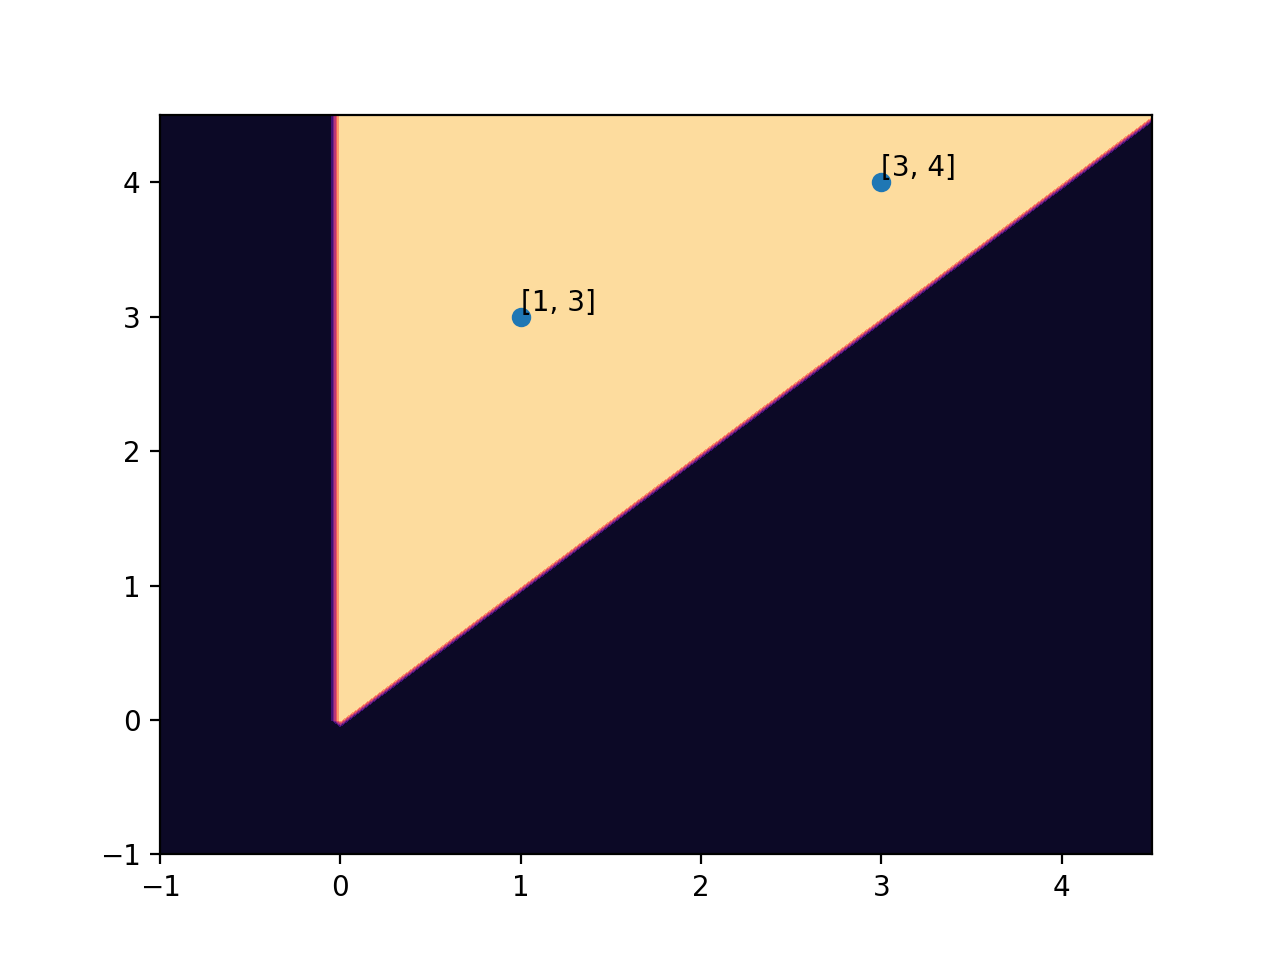

In [2]:
x1, x2 = np.linspace(-1, 4.5, 100), np.linspace(-1, 4.5, 100)
x1, x2 = np.meshgrid(x1, x2)
K = (x1 >= 0) * (x2 >= x1)

p1, p2 = [1, 3], [3, 4]
plt.contourf(x1, x2, K, cmap="magma")
plt.scatter(p1, p2)
for p in [p1, p2]:
    plt.text(*p, f"{p}", verticalalignment="bottom")